<h1 style="text-align:center">Module 6 Assessment</h1>

Welcome to your Mod 6 Assessment. You will be tested for your understanding on concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. Topics in this assessment include graph theory, natural language processing, and neural networks. 

The goal here is to demonstrate your knowledge.  Showing that you know things is more important than getting the best model.

Use any libraries you want to solve the problems in the assessment. 

You will have up to 90 minutes to complete this assessment. 

## Natural Language Processing

In this exercise we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization. Once we successfully classify our texts we will examine our results to see which words are most important to each class of text messages. 

Complete the functions below and answer the question(s) at the end. 

In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

In [23]:
#read in data
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

In [24]:
#convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

In [25]:
#examine or data
df_messages.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### TF-IDF

In [26]:
#separate features and labels 
X = df_messages['v2']
y = df_messages['target']


In [27]:
#generate a list of stopwords 
stopwords_list = stopwords_list = stopwords.words('english') + list(string.punctuation)


<b>1) Let's create a function that takes in our various texts along with their respective labels and uses TF-IDF to vectorize the texts.  Recall that TF-IDF helps us "vectorize" text (turn text into numbers) so we can do "math" with it.  It is used to reflect how relevant a term is in a given document in a numerical way. </b>

In [28]:
#generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [29]:
tf_idf_train, tf_idf_test, y_train, y_test, vecotorizer = tfidf(X, y, stopwords_list)

### Classification

<b>2) Now that we have a set of vectorized training data we can use this data to train a classifier to learn how to classify a specific text based on the vectorized version of the text. Below we have initialized a simple Naive Bayes Classifier and Random Forest Classifier. Complete the function below which will accept a classifier object, a vectorized training set, vectorized test set, and list of training labels and return a list of predictions for our training set and a separate list of predictions for our test set.</b> 

In [30]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [31]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    classifier.fit(tf_idf_train, y_train)
    train_preds = classifier.predict(tf_idf_train)
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds

In [32]:
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,tf_idf_train, tf_idf_test, y_train)

In [33]:
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

[[1202    0]
 [  44  147]]
0.968413496051687


In [34]:
#generate predictions for Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier,tf_idf_train, tf_idf_test, y_train)

In [35]:
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

[[1201    1]
 [  35  156]]
0.9741564967695621


You can see both classifiers do a pretty good job classifying texts as either "SPAM" or "HAM". Let's figure out which words are the most important to each class of texts! Recall that Inverse Document Frequency can help us determine which words are most important in an entire corpus or group of documents. 

In [36]:
def get_idf(class_, df, stopwords_list):
    docs = df[df.v1==class_].v2
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = len(docs)/idf_df.IDF
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(10)

In [37]:
get_idf('spam', df_messages, stopwords_list)

,IDF
call,2.277439
free,4.698113
txt,5.574627
2,5.746154
ur,6.073171
u,7.047170
mobile,7.114286
text,7.114286
claim,7.182692
reply,7.781250


In [38]:
get_idf('ham', df_messages, stopwords_list)

,IDF
u,7.310606
i'm,14.067055
get,17.481884
2,20.188285
go,22.133028
got,22.133028
&lt;#&gt;,22.546729
call,23.309179
like,23.309179
come,23.651961


### Explain
The word school(s) has the highest TF-IDF value in the second document of our test data. What does that tell us about the word school? 

Answer: The word, school is very unique. It is not found frequently across many documents but its present in the second document meaning it has significant importance to this document.

## Network Analysis Assessment

For these next questions, you'll be using a graph dataset of facebook users and networkx. In the next cell, we're going to read in the dataset.

In [1]:
import networkx as nx
G = nx.read_edgelist('./data/0.edges')

###### 1) Create a function `find_centrality` that returns a dictionary with the user with the highest betweenness centrality and the user with the highest degree centrality. It should return a dictionary that looks like:


{'bc' : |user|, 'dc' : |user|}

In [2]:
def find_centrality(graph):
    bc = nx.algorithms.centrality.betweenness_centrality(G)
    max_bc = max(bc.items(), key = lambda kv : kv[1] )
    print('betweenness centrality: ',max_bc)
    dc = nx.algorithms.centrality.degree_centrality(G)
    max_dc = max(dc.items(), key= lambda kv : kv[1])
    print('degree centrality: ', max_dc)
    centrality_dict = {'bc':max_bc[0],'dc':max_dc[0]}
    return centrality_dict

In [3]:
find_centrality(G)

betweenness centrality:  ('277', 0.2658578437822957)
degree centrality:  ('56', 0.23192771084337352)


{'bc': '277', 'dc': '56'}

#### 2) How does each of these people wield influence on the network? Imagine a message had to get to people from different communities. Who would be the best user to deliver the message to ensure that people from opposite communities receive the message?

#### Answer
The user with the highest degree centrality has the most overall connections. The user with the highest betweenness centrality has the most connections go through them. The user with the highest betweenness centrality (277) would be the best person to ensure that people from disparate communities receive the message.



##### 3) A marketing group is looking to target different communities with advertisements based off of their assumed mutual interests. Use the k_cliques_communities method to calculate the number of cliques formed with k users in a function `find_k_communities`. Calculate how many communities there are if the minimum size of a clique is 5.


In [4]:
def find_k_communities(graph,k):
    return len(list(nx.algorithms.community.kclique.k_clique_communities(graph,k)))

In [5]:
find_k_communities(G,5)

12

## Neural Network Assessment 

The deep learning portion of this assessment is split into three main sections.  First, concepts from the introduction to deep learning are assessed by reconstructing the basic building blocks of a neural network.  Then, forward and back-propagation will be discussed in the “Multilayer Perceptron” section, as we build out a fully functioning neural network.

Finally, you will be tuning and optimizing two neural networks trained on data generated with SKLearn — the first with regularization, and the second by modifying different aspects of the gradient descent process for deep learning.  You will receive credit for explaining your steps well even if the model does not improve much.



You will need the following libraries

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_gaussian_quantiles, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential, regularizers
from keras.layers import Dense
from keras.initializers import RandomNormal

<center><b>The Sigmoid Function</b></center>
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

<img src='images/perceptron.png'/>

##### 1) What are the inputs and outputs of a perceptron?

Inputs are either exogenous variables or outputs of other perceptrons.  The output is the result of the multiplication of weights and biases, the addition of a bias term, and then transformation via an activation function e.g. the sigmoid function.

##### 2) Given inputs and weights 1 through l and the sigmoid function (given above), write a function which computes the output y. Assume bias = 0.

In [ ]:
def sigmoid(input_function):
    return 1/(1+np.exp(-1*input_function))

In [ ]:
def perceptron_output(x,w,b=0):
    #b is not necessary, but no points off if they include it
    return sigmoid(b+np.sum(np.multiply(x,w)))

##### 3) What is the role of the sigmoid function here? How does what it does here relate to logistic regression?

#### Answer
The sigmoid function scales the perceptron output to between 0 and 1.  The sigmoid is also used in logistic regression to turn a continuous output into a 0-or-1 classifier.

##### 4) Name two other activation functions and write functions for them as done with the sigmoid in part 1

In [1]:
def activation_1(input_function):
    #RELU
    if input_function>0:
        return input_function
    else:
        return 0

In [ ]:
def activation_2(input_function):
    #TANH
    return np.tanh(input_function)

#### Answer
Relu and hyperbolic tangent are two other examples of activation functions.

Also: inverse tangent, softmax, linear, exponential, and many more.

Several examples here: https://keras.io/activations/

### Multilayer Perceptron

<img src='images/Deeper_network_day2.png'/>

##### Forward propagation

$ Z^{[l]}= W^{[l]} A^{[l-1]} + b^{[l]}$

$ A^{[l]}= g^{[l]} ( Z^{[l]})$

##### Back-propagation
$ dZ^{[l]}= dA ^{[l]} * g^{[l]'} (Z^{[l]})$

$ dW^{[l]} = \dfrac{1}{m} dZ^{[l]}* A^{[l-1]T}$

$ db^{[l]} = \dfrac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True)$

$ dA^{[l-1]} = W^{[l]T}*dZ^{[l]}$

##### 1) Describe the process of forward propagation in neural networks

#### Answer
Outputs of each perceptron are propagated to each node of the next layer and scaled by weights specific to each of these connections.

##### 2) How does what happens in forward-propagation change what happens in back-propagation? Be as specific as possible.

#### Answer
Each time the neural network propagates forward for a given batch, there are residuals due to inaccuracy.  To update the weights and biases in the network, the derivatives of each term are calculated using these residuals and then simultaneously updated using the process of gradient descent.

##### 3) Why is the chain rule important for backpropagation?

#### Answer
The chain rule is a rule for finding the derivative of a function which encapsulates another function.  This is important for backpropagation because residuals are the result of several transformations by the time they arise at the outuput layer.  The chain rule is applied recurssively for each layer in the neural network to get the derivatives which determine weight and bias updates in backpropagation.

#### 4) You are training a neural network to pick out particular sounds in a dataset of audio files. Assume all preprocessing has already been done. If there are several sounds in each mp3 file, how would you modify your output layer to identify whether a particular sound occurs? How does your interpretation change assuming more than one sound can be in each file?

#### Answer
This is a multi-label problem.  There should be one output for each label.  If a specific output node is over a certain threshold, then that node's label is assigned to that observation.

### Regularization and Optimization of Neural Networks

These datasets are created using SKLearn, and should be improved. Although changing the number of nodes and layers may improve the models, focus on regularization in the first dataset, and gradient descent in the second.

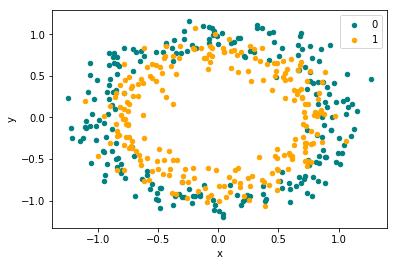

In [5]:
np.random.seed(0)
# generate 2d classification dataset
X, y = make_circles(n_samples=450, noise=0.12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'teal', 1:'orange'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key != 2:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Regularization: The following model is over-fit. Modify the following code to address the discrepancy between train and test accuracy.m

In [6]:
#train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### 1) Modify the code below to use L2 regularization


Your code goes in the cell below. Try running once without regularization first and look at what happens to train and test accuracy.

Hint: use the activity_regularizer parameter in both of the hidden layers.

In [7]:
np.random.seed(0)

#Instantiate Classifier
classifier = Sequential()

#Hidden Layer
classifier.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',
    activity_regularizer = 'l2'
))

#Hidden Layer
classifier.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',
    activity_regularizer = 'l2'
))

#Output Layer
classifier.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

Instructions for updating:
Use tf.cast instead.


Look what happens to train and test accuracy as you modify the model

In [ ]:
# TRAIN

#predict classes
predicted_vals_train = classifier.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))

In [ ]:
# TEST

#predict classess
predicted_vals_test = classifier.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))

##### 2) Explain what you did and how it changed the train and test accuracy

#### Answer
A weight penalization term was added for the two hidden layers.  Train accuracy went down, but test accuracy went up, meaning that overfitting was decreased.

##### 3) Explain what regularization does, and how it affects the final weights of a model.

#### Answer
Regularization penalizes high weights by modifying the cost function, which can help reduce overfitting.

##### 4) How does L1 regularization change a neural network's architecture?

#### Answer
L1 regularization may eliminate connections between nodes entirely.

### Optimization with Gradient Descent

A 3 dimensional dataset is generated using SKlearn and a poorly fit neural network is fit to it. Try improving the model using what's available through Keras, and then explain what you did in part 5.

<img src='images/data.png' width="50%"/>

Generate 3d data with complex error surface for MLP

In [13]:
np.random.seed(0)
# Construct dataset
# Gaussian 1
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=3,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y','z'])
y1 = pd.Series(y1)

# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4,2), cov=1,
                                 n_samples=5000, n_features=3,
                                 n_classes=2, random_state=2)
X2 = pd.DataFrame(X2,columns=['x','y','z'])
y2 = pd.Series(y2)
# Combine the gaussians
X1.shape
X2.shape
X = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

##### 5) Modify the code below to improve the starter model

Hint: use help(Dense) to see what parameters you can change. You should be able to explain how these parameters relate to gradient descent. Don't worry too much about overfitting in this example, just focus on gradient descent.

In [22]:
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), input_dim=3))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))

In [23]:
#Compiling the neural network, and specifying to measure accuracy at each step
classifier.compile(optimizer ='adam',loss='poisson', metrics =['accuracy'])

In [25]:
#Fitting the neural network
classifier.fit(X,y, batch_size=5, epochs=10,verbose=1)

Epoch 1/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.8466 - acc: 0.5011
Epoch 2/10
15000/15000 [==============================] - 2s 101us/step - loss: 0.8465 - acc: 0.5104
Epoch 3/10
15000/15000 [==============================] - 2s 102us/step - loss: 0.8463 - acc: 0.5377
Epoch 4/10
15000/15000 [==============================] - 2s 104us/step - loss: 0.8459 - acc: 0.5725
Epoch 5/10
15000/15000 [==============================] - 2s 110us/step - loss: 0.8449 - acc: 0.5861
Epoch 6/10
15000/15000 [==============================] - 2s 109us/step - loss: 0.8423 - acc: 0.6076
Epoch 7/10
15000/15000 [==============================] - 2s 107us/step - loss: 0.8374 - acc: 0.6387
Epoch 8/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.8287 - acc: 0.6598
Epoch 9/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.8025 - acc: 0.7192
Epoch 10/10
15000/15000 [==============================] - 2s 104us/step - loss: 0.7705 - a

##### 6) Explain why modifying the gradient descent process does anything and how it works.  Include parameters you tried even if they did not improve the model.

#### Answer
1. kernel_initializer - changing this term can chang where the model converges, due to local minima.  A different minimum for the cost function can be reached if weight start differently.
2. batch size - this is the number of observations the model is trained on in each iteration.  
3. loss - changing the loss function changes residuals and therefore backpropagation.
4. optimizer - changes how the learning rate is adjusted

Students may come up with more